In [1]:
%matplotlib notebook

In [2]:
from matplotlib import pyplot as plt, cm
import pandas as pd

from analytics.load_data import Data

In [3]:
MODELS_MAP = [
    (0, '#ea4335', 'Leaky Integrate-and-Fire', ['LIF']),
    (1, '#f4665b', 'Integrate-and-Fire (Other)', ['IF', 'CUBA']),
    (2, '#f07b72', 'Spike Response Model', ['SRM']),
    (3, '#f1f113', 'Izikevich', ['IZ']),
    (4, '#34a853', 'Hodgkin-Huxley', ['HH']),
    (5, '#46bdc6', 'Multi-Compartmental', ['DS', 'Gap junctions', 'Compartmental', 'Nonlinear Dendrites']),
    (7, '#434343', 'Unknown', ['-']),
]
OTHER_MODELS = (6, '#864ea7', 'Other Models', ['LIF', 'IF', 'CUBA', 'SRM', 'IZ', 'HH', 'DS', 'Gap junctions', 'Compartmental', 'Nonlinear Dendrites', '-'])

In [4]:
dflea = Data.load_data(Data.LEARNING)
dfnet = Data.load_data(Data.NETWORKS)
dfmod = Data.load_data(Data.MODELS)
dfapp = Data.load_data(Data.APPLICATIONS)
dfres = Data.load_data(Data.BENCHMARK)

In [5]:
dfres.columns = ['Benchmark', 'Model', 'Architecture', 'Learning Algorithm', 'Variant',
       'Result', 'Paper', 'Year', 'Notes']

df = pd.merge(dfmod, dfnet, how='outer', on='Paper').dropna()
df2 = pd.merge(df, dfapp, how='outer', on='Paper').dropna(subset=['Model', 'Area'])


In [ ]:
df2.groupby(['Paper', 'Area']).sum()

In [6]:
import re
RE = re.compile(r".+(?P<year>\d{4})[a-z]?")
bmrkonly = pd.DataFrame([(x, int(RE.match(x).group('year'))) for x in dfres['Paper'].unique()], columns=['Paper', 'Year'])

,Paper,Model,Year
0,Abderrahmane2020,LIF,2020
1,Belatreche2006,DS,2006
2,Belatreche2006,SRM,2006
3,Belatreche2012,SRM,2012
4,Bellec2018a,LIF,2018
...,...,...,...
99,Zhang2019,S-PSP,2019
100,Zhang2021,SRM,2021
101,Zhang2021a,LIF,2021
102,Zhao2015,SRM,2015


In [41]:
# df3 = pd.merge(df2, bmrkonly, how='outer', on='Paper')
df3 = pd.merge(pd.merge(df, dfapp, how='outer', on='Paper'), dfres.groupby(['Paper','Model']).mean()['Year'].reset_index(), how='outer', on='Paper')
idcs = (~df3['Year_y'].isna()) | (df3['Focus'] == 'benchmarks')
df3.loc[idcs, 'Area'] = 'Benchmark'

for col in ['Model', 'Year']:
    idcs = df3[f'{col}_x'].isna()
    df3.loc[idcs, f'{col}_x'] = df3[idcs][f'{col}_y']
    del df3[f'{col}_y']
df3.columns = ['Paper', 'Model', 'Year', 'Size', 'Area', 'Focus', 'Notes']
df3.dropna(subset=['Model', 'Area'], inplace=True)

In [42]:
df3

,Paper,Model,Year,Size,Area,Focus,Notes
0,Abderrahmane2020,LIF,2020.0,1694.0,Benchmark,NaN,NaN
1,Abderrahmane2020,LIF,2020.0,1094.0,Benchmark,NaN,NaN
6,Alnajjar2008,SRM,2008.0,9.0,Robotics,mobile robot control,NaN
7,Alnajjar2008a,SRM,2008.0,5.0,Robotics,mobile robot control,NaN
8,Amit1997,LIF,1997.0,100000.0,Simulation,statistics,NaN
...,...,...,...,...,...,...,...
513,Garbin2014,OxRAM,2014.0,NaN,Benchmark,NaN,NaN
514,Hussain2014,LIF,2014.0,NaN,Benchmark,NaN,NaN
515,Paulun2021,LIF,2021.0,NaN,Benchmark,NaN,NaN
516,Raghavan2019,IZ,2019.0,NaN,Benchmark,NaN,NaN


In [ ]:
plt.figure()
xticks = []
# plt.scatter(df['Year'], df['Size'], marker="2", c=df['Model'].transform(lambda x: color_map[x]*color_frac), cmap=cmap)
for (idx, color, label, models) in MODELS_MAP:
    subset = df[df['Model'].isin(models)]
    plt.scatter([label]*len(subset), subset['Size'], marker="2", c=color, label=label)
    xticks.append(label)
subset = df[~df['Model'].isin(OTHER_MODELS[3])]
plt.scatter([OTHER_MODELS[2]]*len(subset), subset['Size'], marker="2", c=OTHER_MODELS[1], label=OTHER_MODELS[2])
xticks.append(OTHER_MODELS[2])
plt.yscale('log')
plt.yticks([pow(10, expo) for expo in range(11)])
print(xticks)
# plt.xticks(xticks, rotation='vertical')
plt.xticks([])
plt.legend()
plt.grid(True, which='both', axis='y')
plt.ylabel("Number of neurons")
plt.xlabel("Class of neuron model")

In [ ]:
plt.figure()
boxes = []
labels = []
for (idx, color, label, models) in MODELS_MAP:
    boxes.append(df[df['Model'].isin(models)]['Size'])
    labels.append(label)
boxes.append(df[~df['Model'].isin(OTHER_MODELS[3])]['Size'])
labels.append(OTHER_MODELS[2])

plt.boxplot(boxes, labels=labels, sym="2")
plt.yscale('log')
plt.yticks([pow(10, expo) for expo in range(11)])
plt.xticks(rotation='vertical')
plt.legend()
plt.grid(True, which='both', axis='y')
plt.ylim([1, 1e10])
plt.ylabel("Number of neurons")
plt.xlabel("Class of neuron model")

In [ ]:
df3['Area'].unique()

<IPython.core.display.Javascript object>


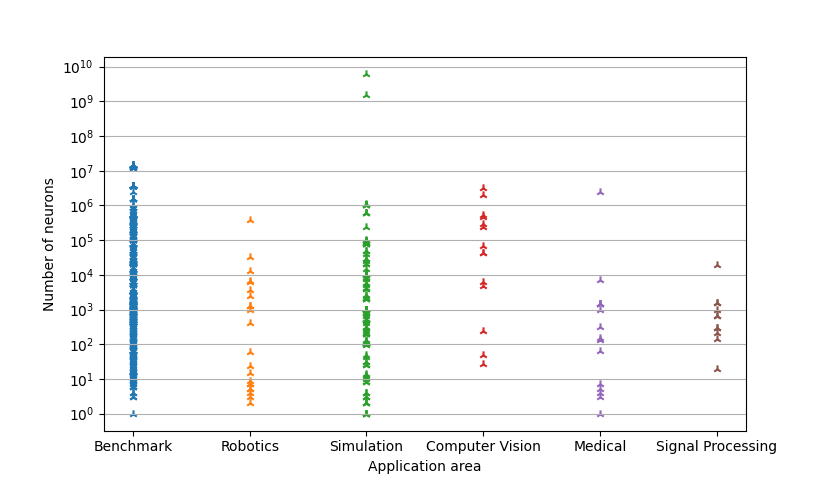

Text(0.5, 0, 'Application area')

In [22]:
plt.figure()
for app in df3['Area'].unique():
    subset = df3[df3['Area'] == app]
    plt.scatter([app]*len(subset), subset['Size'], marker="2", label=app)

plt.yscale('log')
plt.yticks([pow(10, expo) for expo in range(11)])
# plt.legend()
plt.grid(True, which='both', axis='y')
plt.ylabel("Number of neurons")
plt.xlabel("Application area")

<ipython-input-45-8cc231058735>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Model'][~temp['Model'].isin(OTHER_MODELS[3])] = OTHER_MODELS[2]
<ipython-input-45-8cc231058735>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Model'][temp['Model'].isin(models)] = label


<IPython.core.display.Javascript object>


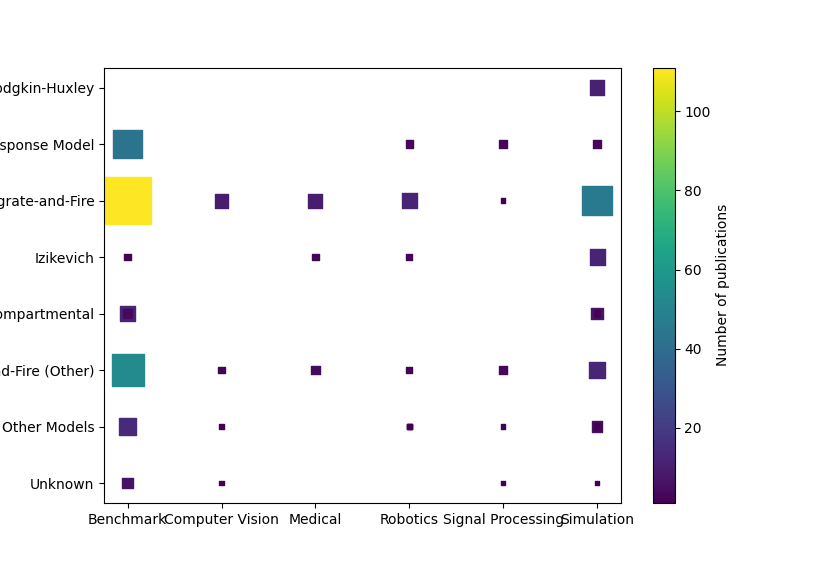

(1, 111)

In [45]:
cmap = cm.get_cmap('viridis')
temp = df3.groupby(['Area', 'Model']).count()['Paper'].reset_index()
temp['Model'][~temp['Model'].isin(OTHER_MODELS[3])] = OTHER_MODELS[2]
for (_, _, label, models) in MODELS_MAP:
    temp['Model'][temp['Model'].isin(models)] = label
plt.figure()
idcs = temp['Area'].isin(['Medical', 'Robotics', 'Signal Processing', 'Computer Vision', 'Simulation', 'Benchmark'])
plt.scatter(temp[idcs]['Area'], temp[idcs]['Model'], marker="s", s=temp[idcs]['Paper']*10, c=temp[idcs]['Paper']/temp[idcs]['Paper'].max(), cmap=cmap)
smap = cm.ScalarMappable(cmap=cmap)
smap.set_clim(temp[idcs]['Paper'].min(), temp[idcs]['Paper'].max())
cbar = plt.colorbar(smap)
cbar.set_label("Number of publications")
temp[idcs]['Paper'].min(), temp[idcs]['Paper'].max()

In [ ]:
print(dfres['Neuron'].unique())
dfres[dfres['Neuron'].isin(['Compartmental', 'Other'])]

In [43]:
temp = df3.groupby(['Area', 'Model']).count()['Paper'].reset_index()
temp.loc[~temp['Model'].isin(OTHER_MODELS[3]), 'Model'] = OTHER_MODELS[2]
temp.groupby(['Area', 'Model']).sum()

Paper
Area              Model                     
Benchmark         -                        6
                  CUBA                     1
                  Compartmental           12
                  DS                       4
                  IF                      53
                  IZ                       2
                  LIF                    111
                  Other Models            48
                  SRM                     43
Computer Vision   -                        1
                  IF                       2
                  LIF                     10
                  Other Models             1
Medical           IF                       4
                  IZ                       2
                  LIF                     10
Robotics          IF                       2
                  IZ                       2
                  LIF                     12
                  Other Models             3
                  SRM                      3
Signal Processing -                        1
                  CUBA                     2
                  IF                       3
                  LIF                      1
                  Other Models             1
                  SRM                      3
Simulation        -                        1
                  Compartmental            7
                  DS                       1
                  Gap junctions            2
                  HH                      11
                  IF                      13
                  IZ                      12
                  LIF                     46
                  Nonlinear Dendrites      1
                  Other Models            23
                  SRM                      3